<a href="https://colab.research.google.com/github/ssweta3seal/Seoul_Bike_Sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing the Modules and Loading the Dataset**

In [433]:
#Importing the required packages
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [434]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
#Reading the file
bike_data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Machine Learning Capstone project/REGRESSION/SEOUL BIKE SHARING/SeoulBikeData (1).csv",encoding="unicode_escape")


# **Exploring the data in the given dataset**

In [436]:
#Data in the top 5 rows 
bike_data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [437]:
#Data in the bottom 5 rows
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [438]:
# Printing the shape of the dataset
bike_data.shape

(8760, 14)

In [439]:
#Printing the attributes of dataset
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [440]:
#Understanding the datatype of each attribute
bike_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [441]:
# Checking for Null values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [442]:
#Finding the unique values
bike_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [443]:
#Analysing both categorical and numerical values in the dataset
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Feature Description**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY,

Type : str,
we need to convert into datetime format.


**Rented Bike Count**: Number of rented bikes per hour which our dependent variable and we need to predict that,

 Type : int.

**Hour**: The hour of the day, starting from 0-23, it is in a digital time format,

 Type : int, we need to convert it into category data type.


**Temperature(°C)**: Temperature in Celsius, 

Type : Float

**Humidity(%)**: Humidity in the air in %, 


Type : int

**Wind speed (m/s)** : Speed of the wind in m/s, 

Type : Float

**Visibility (10m)**: Visibility in m, 

Type : int

**Dew point temperature(°C)**: Temperature at the beginning of the day, 

Type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, 

Type : Float

**Rainfall(mm)**: Amount of rain in mm, 

Type : Float

**Snowfall (cm)**: Amount of snowing in cm, 

Type : Float

**Seasons**: Season of the year, 

Type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday or not, 

Type: str

**Functioning Day**: If the day is a Functioning Day or not, 

Type : str

# **Looking for Duplicate and Missing values**

In [444]:
#Count of missing values in each attribute.
bike_data.isna().sum()
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can say from the above, that there are no missing values present in any attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


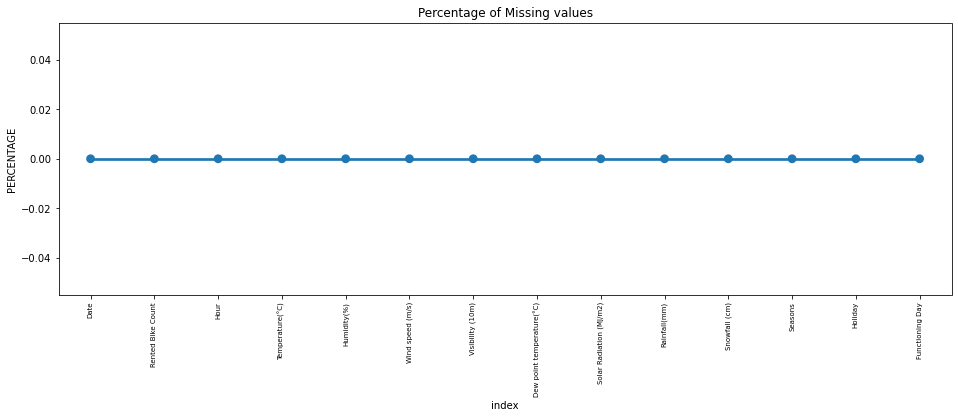

In [445]:
#Plotting the missing values
missing = pd.DataFrame((bike_data.isnull().sum())*100/bike_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [446]:
# Checking Duplicate Values
duplicate_values=len(bike_data[bike_data.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_values)

The number of duplicate values in the data set is =  0


From the above analysis, we can say that there are no missing or duplicate values present in the given datset.

But we can see that, some attribute names are too clumpsy to handle,
so changing the attribute names to reduce to complexity for exploring the data frequently.

# **Observations and actions to be performed**

1)**Null values/missing values**-0

2)**Date**- attribute needed to be converted into proper data type.


3)**Attributes to be converted into numeric(for modelling Purpose)**

a) Seasons

b) Holiday

c) Functioning day


4)**Attributes to be Renamed-**

Temperature(°C)

Humidity(%)

Wind speed (m/s)

Visibility (10m)

Dew point temperature(°C)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)

Rented Bike Count

Functioning Day

( For Spaces and as variables having units in brackets which makes it difficult to copy variable names.)

In [447]:
# Checking the attributes
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [448]:
#Renaming the complex attribute names
bike_data=bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [449]:
# Changing The datatype of Date attribute to extract 'Month','Day',"Year". so that we can analyze the Bike rentals with respect to year, months and days.
bike_data['Date']=bike_data['Date'].astype('datetime64[ns]')

In [450]:
# Creating new attributes 'Month','Year','Day'.
bike_data['Month']=bike_data['Date'].dt.month
bike_data['Day']=bike_data['Date'].dt.day_name() 
bike_data['year'] =bike_data['Date'].dt.year

In [451]:
# Creating new attribute and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_data['weekdays_weekend']=bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [452]:
# Checking the newly created attributes
bike_data.head(20)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,year,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
5,2017-01-12,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
6,2017-01-12,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
7,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
8,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
9,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [453]:
# Droping 'Day', 'Date', 'Year' attributes.

bike_data.drop(['Date',"Day",'year'], axis=1 ,inplace=True)

So we converted the "date" attribute into 3 different attributes i.e "year","month","day".

The "year" attribute in our data set basically contains 2 unique numbers, the details from 2017 december to 2018 november so if i consider this as one year then we don't need the "year" attribute so we drop it.

The other attribute "day", contains the details about each day of the month, for our analysis we don't need the data of each day of each month, all  we need from the data is, if a day is a weekday or a weekend,

so we convert it into this format and drop the "day" column

In [454]:
bike_data.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [455]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [456]:
# Value count weekdays_weekend categories
bike_data['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [457]:
# Value count for Seasons categories
bike_data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [458]:
# Value count for Holiday categories
bike_data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [459]:
# Value count for Functioning_Day categories
bike_data['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [460]:
# Value count for Month categories
bike_data['Month'].value_counts()


1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

# **Exploratory Data Analysis Of The Data Set**

## **Analysis on Categorical Variables**

[Text(0.5, 1.0, 'Count of Rented bikes according to Month ')]

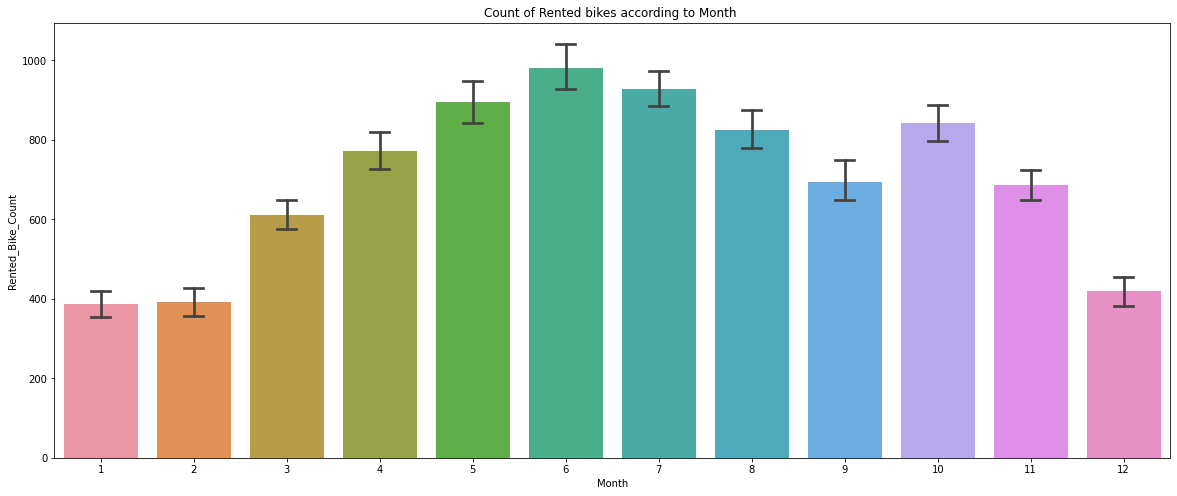

In [461]:
#Analysis on Month attribute
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_data,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Month ')

Text(0.5, 1.0, 'Bike Rental count according to Hour in different months')

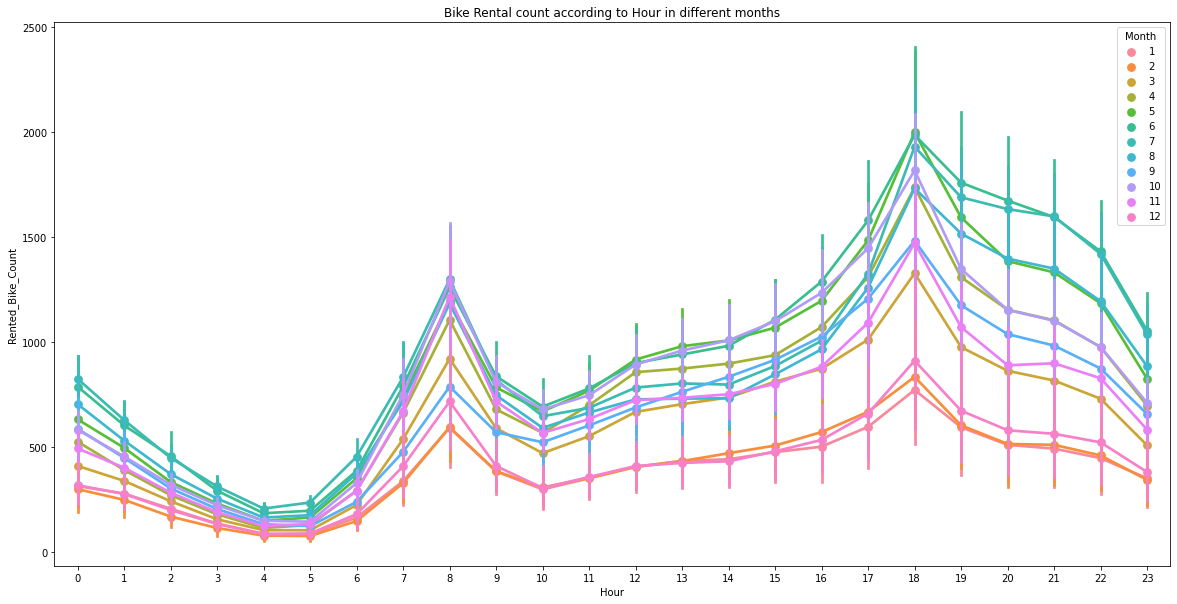

In [462]:
# Bike Rental Count with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_data['Hour'],y=bike_data['Rented_Bike_Count'],hue=bike_data['Month'])
plt.title("Bike Rental count according to Hour in different months")

From the above bar plot we can say that from the month 5 to 10 the demand of the rented bike is high as compared to other months and these months comes under the summer season.

Rented bike count is higher in the 6th month from the above plot.

From the pointplpot we can say that, there is sudden peak between 6/7 am to 10 am. 
Office time, College time could be the reason for this sudden peak.

Again we can see a peak between 5pm to 8 pm.
This may be due to office/college leaving time for the above people.

We can also say that,from morning 7 AM to Evening 8 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekend ')]

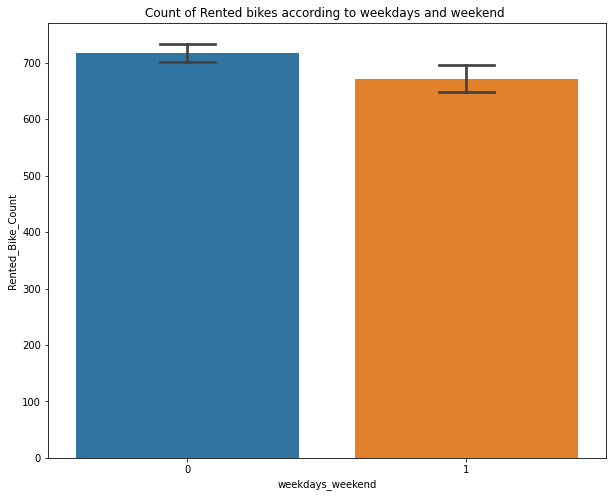

In [463]:
#Analysis on weekdays_weekend attribute
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_data,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays_weekend ')]

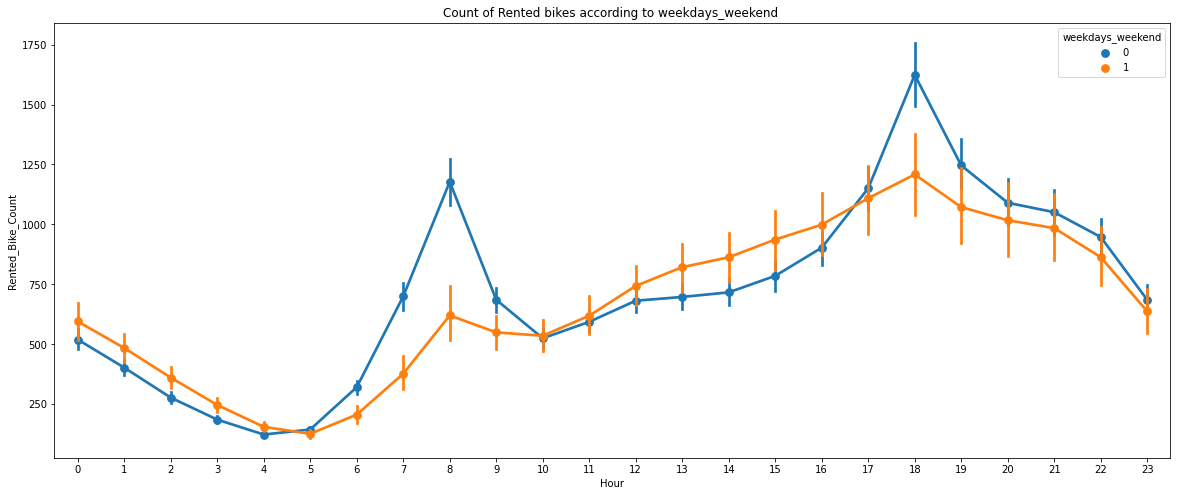

In [464]:
# Bike Rental count with respect to Hour on weekdays_weekend
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_data,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes according to weekdays_weekend ')

From the above bar plot and point plot, we can say that the demand of the bikes is higher on weekdays than on the weekends.

This might be due to the office for employees or schools/colleged for children.

Peak Time are between 7 am-9 am and 5 pm-7 pm.

The orange line above represents the weekend days, and it shows that the demand of rented bikes are very low in the mornings but in the evening from 4 pm to 8 pm the demand slightly increases.*

[Text(0.5, 1.0, 'Count of Rented bikes according to Hour ')]

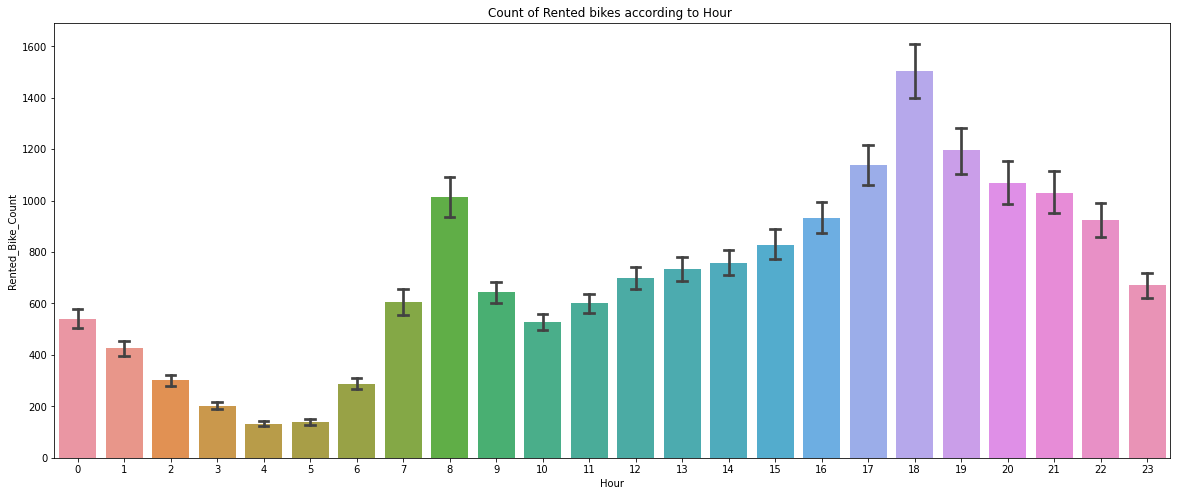

In [465]:
#Analysis on Hour attribute
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_data,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Hour ')

From the above plot we can say that the use of rented bikes are high from 7am-9am and 5pm-8pm.

This might be due to the working hours of employees or school/college timings for students.

[Text(0.5, 1.0, 'Count of Rented bikes according to Functioning Day ')]

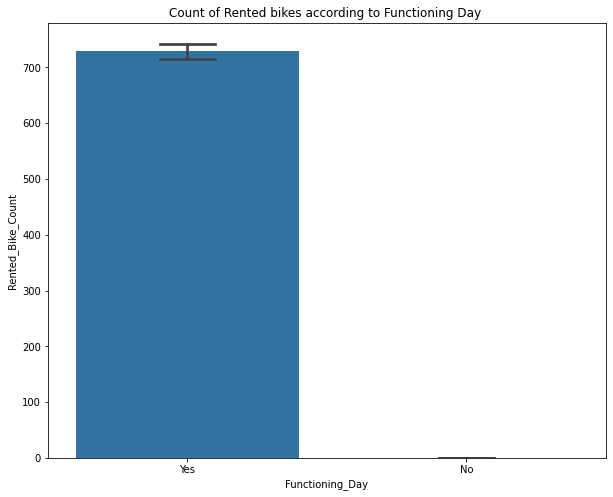

In [466]:
#Analysis on Functioning_Day attribute
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_data,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes according to Functioning Day ')]

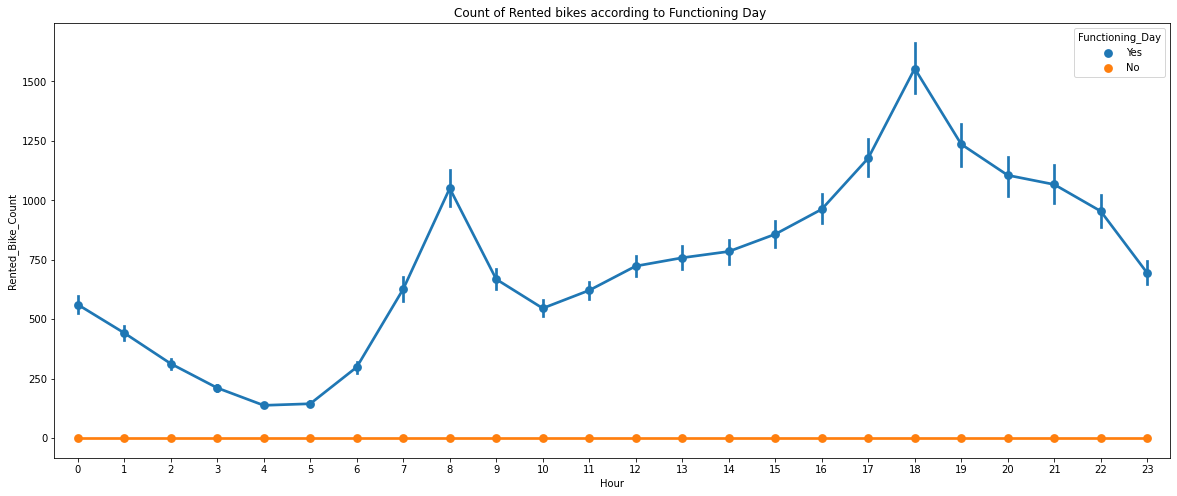

In [467]:
# Bike Rental count with respect to Hour on Functioning_Day
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_data,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes according to Functioning Day ')

From the above bar plot and point plot which shows the use of rented bikes on functioning day and non functioning Day, we can say that,Peoples dont use reneted bikes on non functioning days.

We can also say from the above that count of rented bikes are high between 7am-9am and 5pm-7pm

[Text(0.5, 1.0, 'Count of Rented bikes according to Seasons ')]

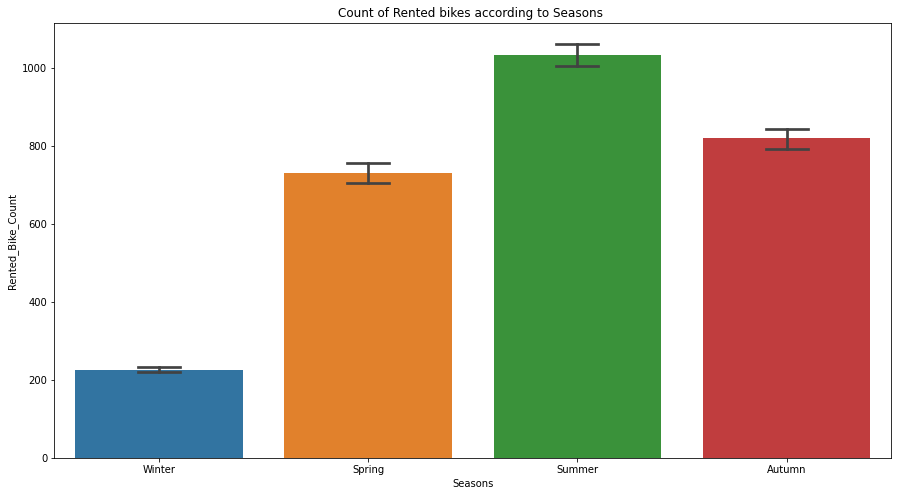

In [468]:
#Analysis on Season attribute
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes according to seasons ')]

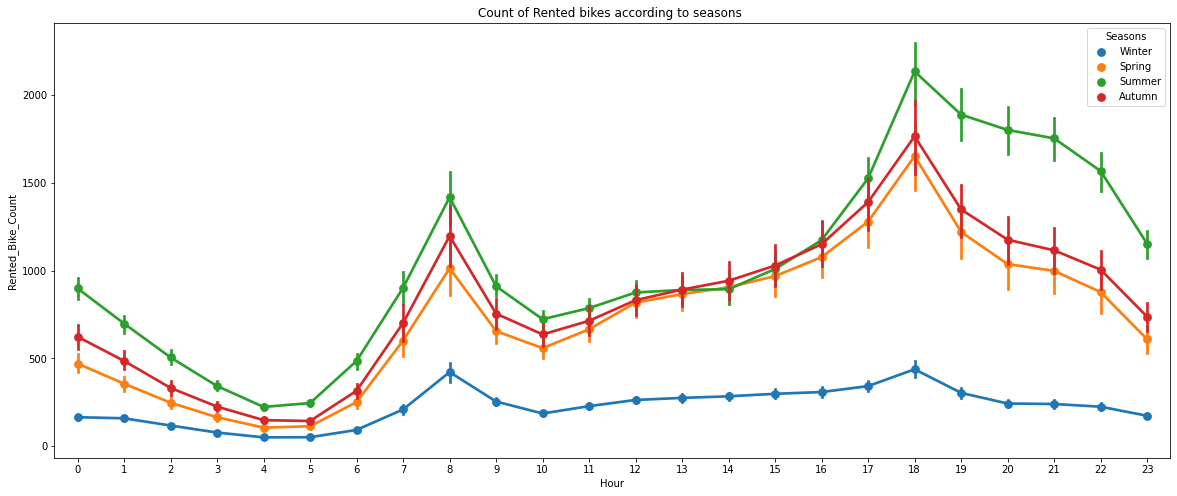

In [469]:
# Bike Rental count with respect to Hour on different Seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_data,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes according to seasons ')

From the above bar plot and point plot which shows the use of rented bikes in four different seasons, we can say that,

In the summer season, use of rented bikes is high and peak time is between 7am-9am and 5pm-7pm.

In the winter season, use of rented bikes is very low, which might be due to the rains and unfavourable weather conditions.

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday ')]

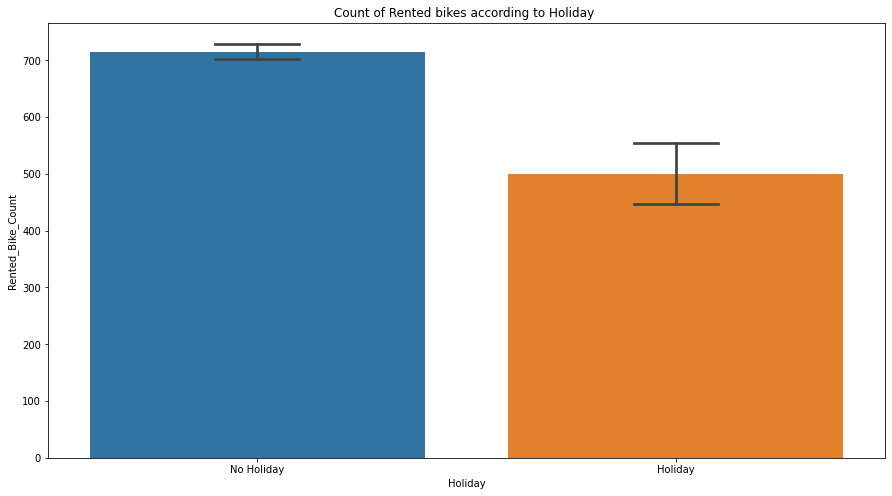

In [470]:
#Analysis on Holiday attribute
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday ')]

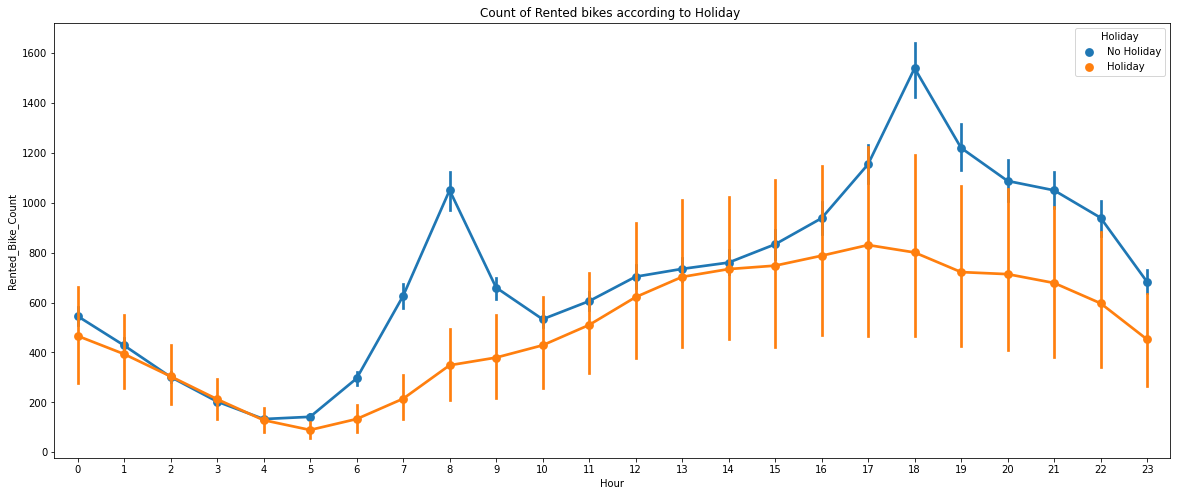

In [471]:
# Bike Rental count with respect to Hour on Holiday
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_data,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday ')

From the above bar plot and point plot which shows the use of rented bike in a holiday, we can say that,

Use of Rented bikes is high on No Holidays than on Holidays and the peak timings are between 7am-9am and 5pm-9pm.

We can also say that on Holiday people uses the rented bike from 2pm-7pm

# **Analysis on Numerical Variables**

In [472]:
#Creating a attribute for analysis of numeric variables
numerical_columns=list(bike_data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Month', 'weekdays_weekend'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

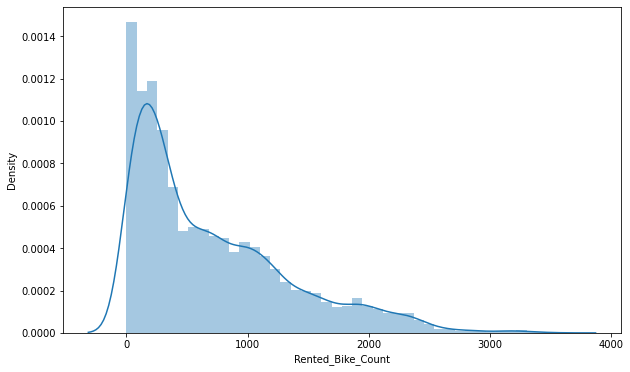

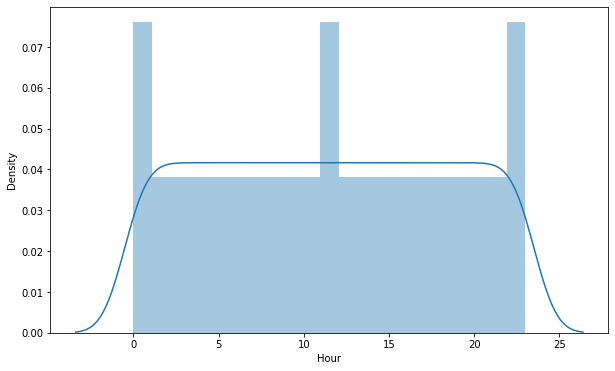

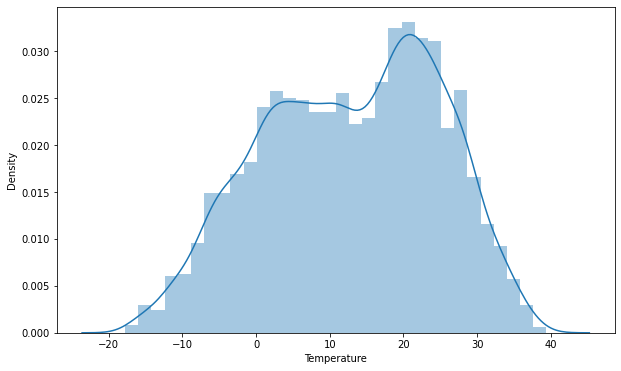

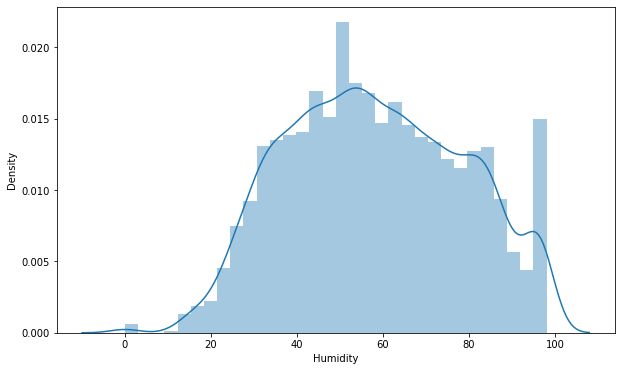

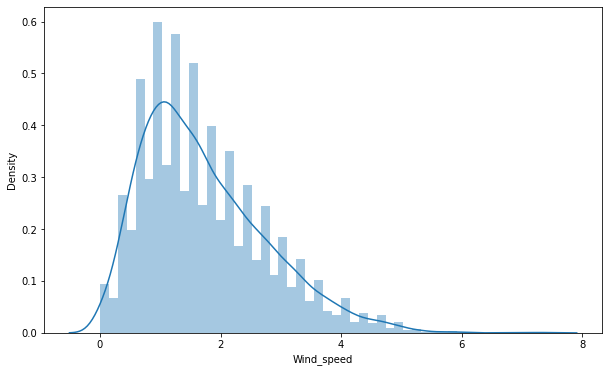

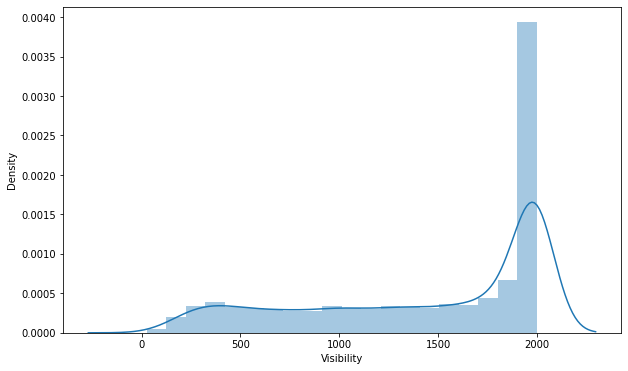

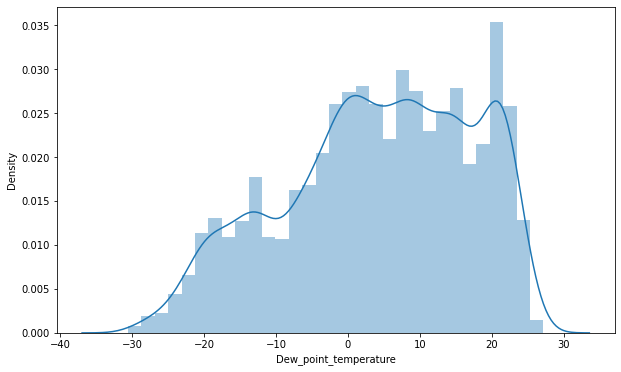

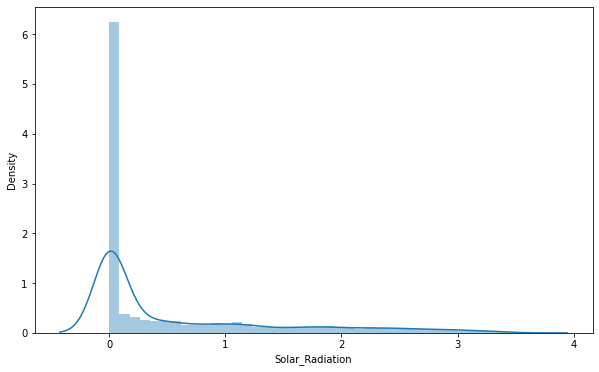

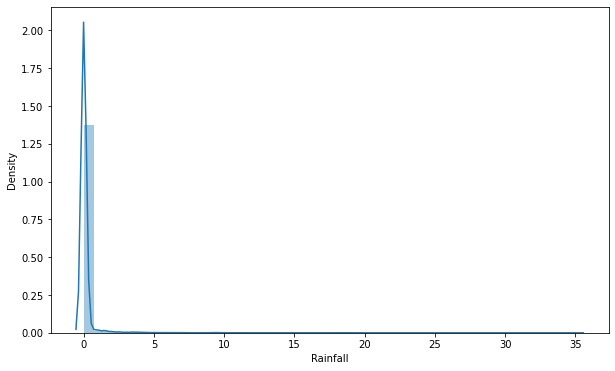

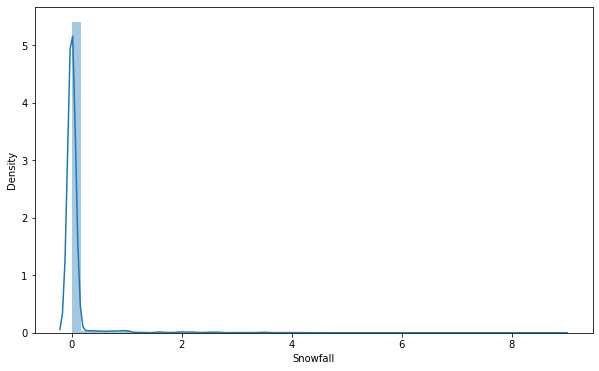

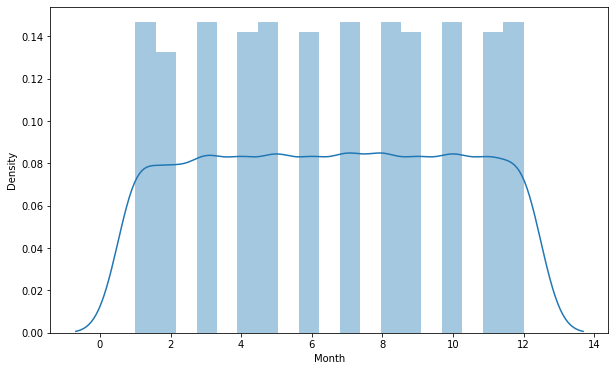

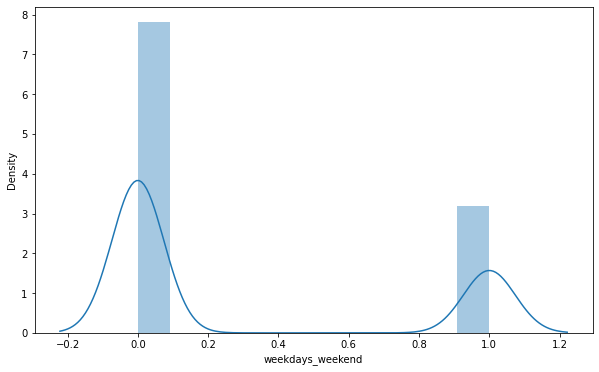

In [473]:
#Analyzing the distribution of all numerical attributes through distplots
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_data[col])
  plt.xlabel(col)
plt.show()

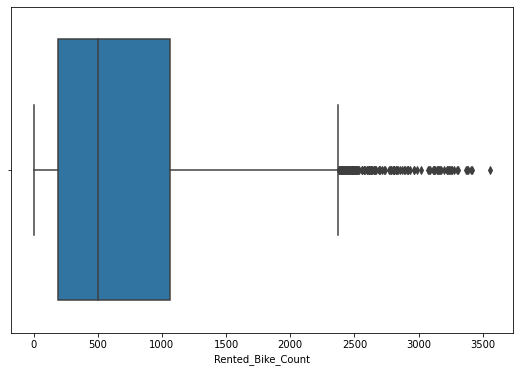

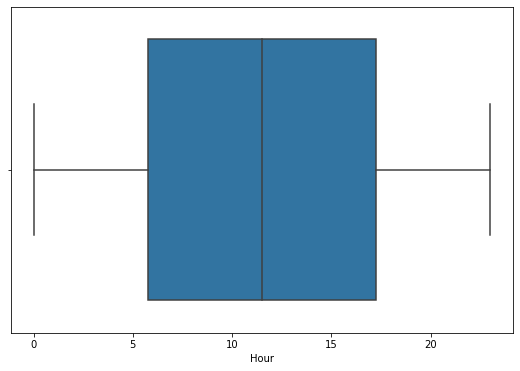

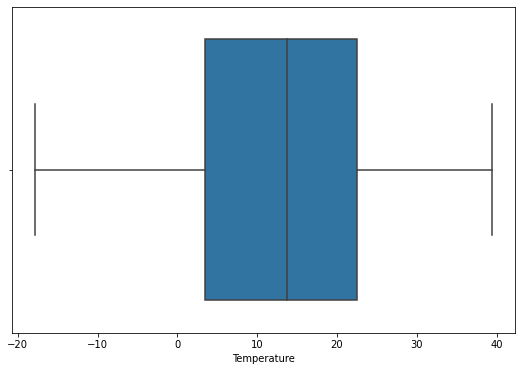

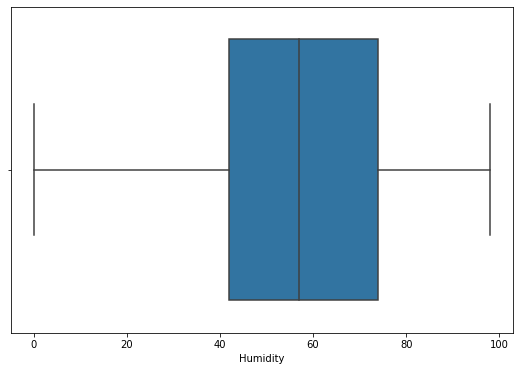

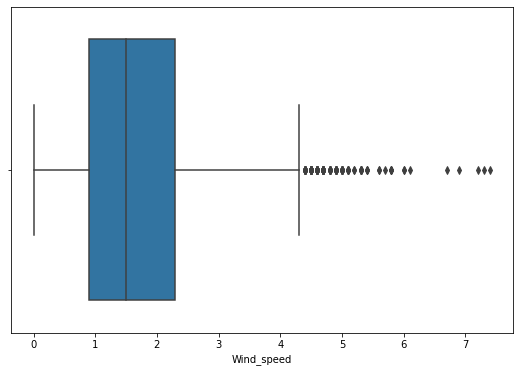

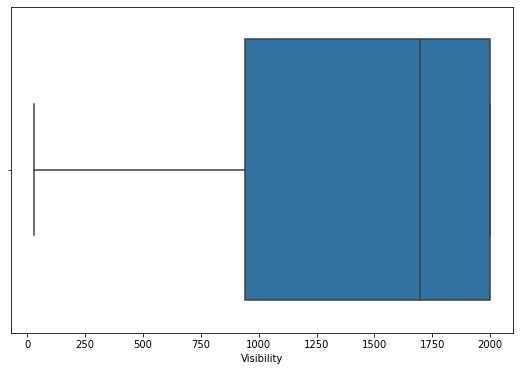

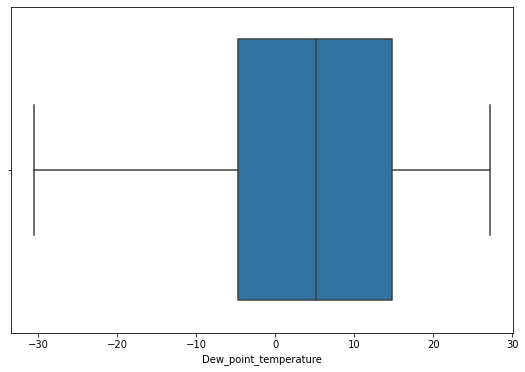

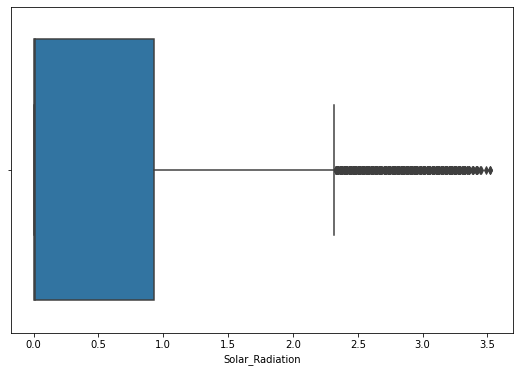

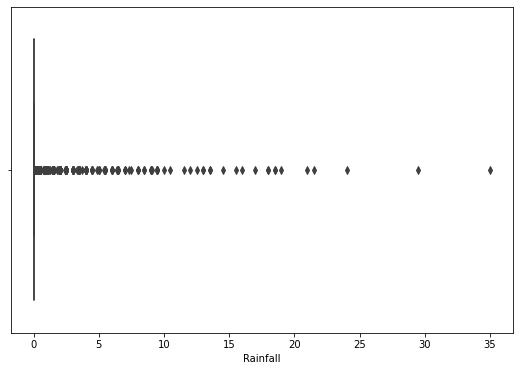

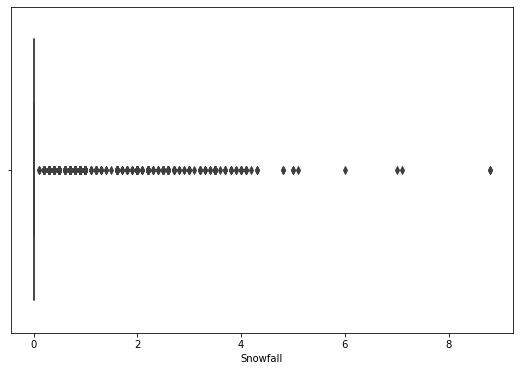

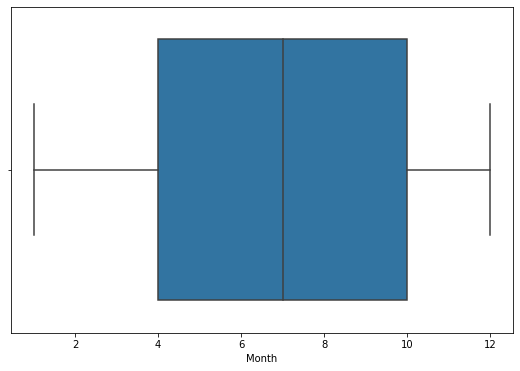

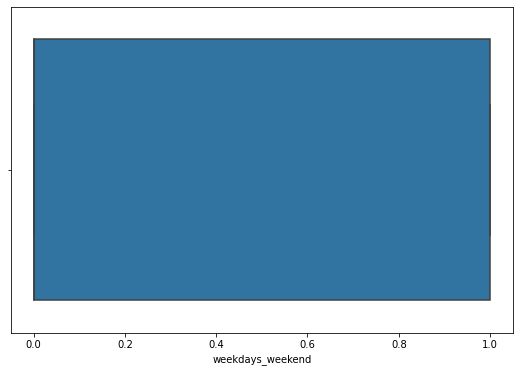

In [474]:
# priting box plots of numeric attributes to check oultliers
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_data[col])

**Analysis of Numerical variables with respect to dependent variable**



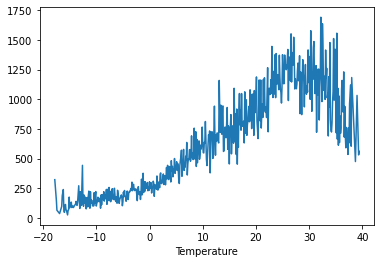

In [475]:
#Analyzing the relationship between "Rented_Bike_Count" and "Temperature" 
bike_data.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

From the above plot we can say that people like to ride bikes when the temparature is above 20 and are less probable to ride bikes in lower temparatures

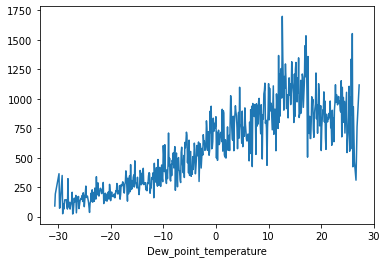

In [476]:
#Analyzing the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

From the above plot, we can observe from the results that, "Dew_point_temperature' is almost same as the 'temperature',

From this we can assume that there must be some corelation present between them.

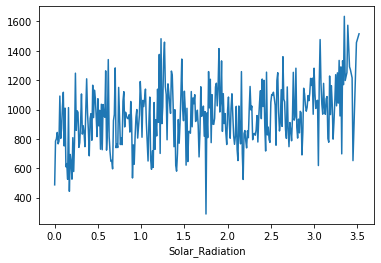

In [477]:
#Analyzing the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

From the above plot we can say that, the amount of rented bikes is huge, when there is solar radiation, and the average count of bikes rented is around 1000

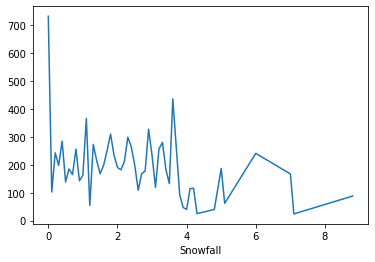

In [478]:
#Analyzing the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_data.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


From the plot we can see that, the amount of rented bike is very low and when we have a snowfall of more than 4 cm, the bike rents count is much lower.

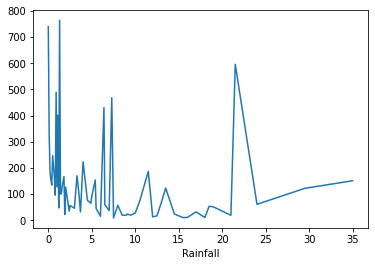

In [479]:
#Analyzing the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

From the above plot we can say that even with rainfalls, demand for rental bikes is not decreasing, we can see from above that, even having a rainfall of 20 mm, there is a big peak of rented bikes

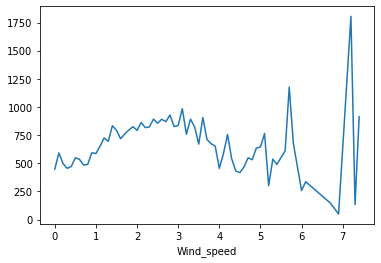

In [480]:
#Analyzing the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_data.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

From the above plot we can say that the demand of rented bike is uniformly distributed despite of wind speed.

We can also see that, when the speed of wind is 7 m/s, the demand for bike rentals increased rapidly, from which we can say that peoples love to ride bikes when its little windy.

## **Checking the distribution of target variable- "Bike Rented Count"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


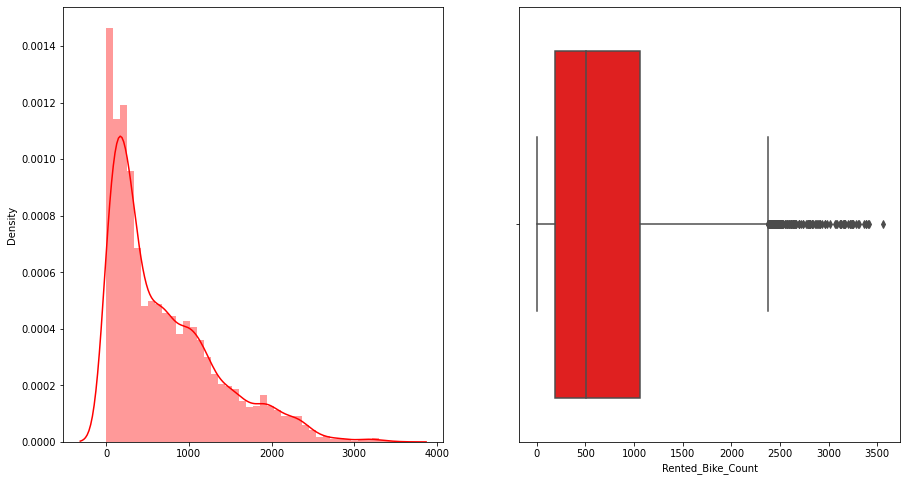

In [481]:
#Checking the distribution and outliers
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=bike_data['Rented_Bike_Count'],color='red',ax=axes[0])
# Boxplot for outliers
sns.boxplot(x=bike_data['Rented_Bike_Count'],color='red',ax=axes[1])

The above graph shows that Rented Bike Count is slightly right skewed. 

Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

From the boxplot we can see that we have outliers in Rented Bike Count column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


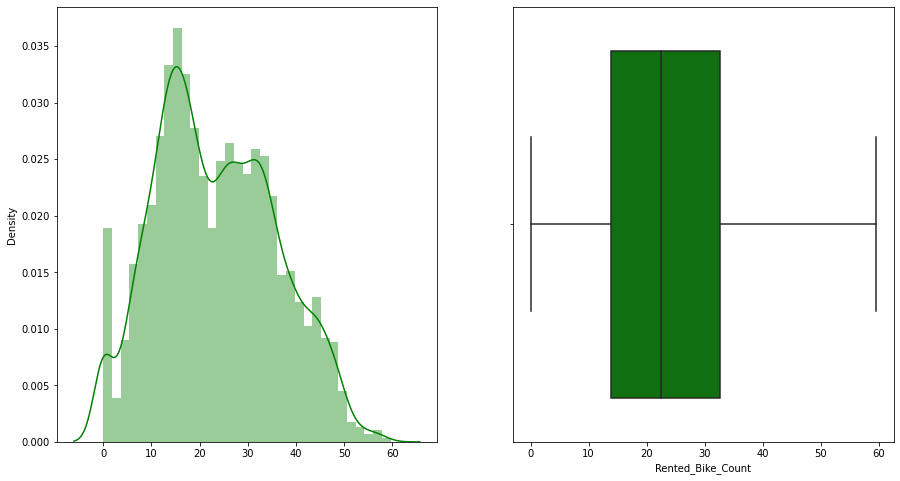

In [482]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_data['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_data['Rented_Bike_Count']),color='g',ax=axes[1])

Thus we normalized our dependent variable by square root method and also in boxplot we can see that there are no outliers.

## **Checking distribution of independent variables**

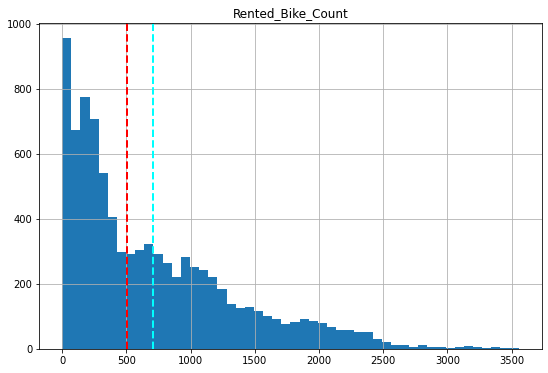

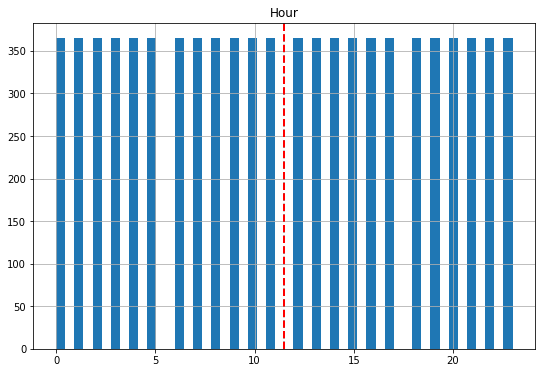

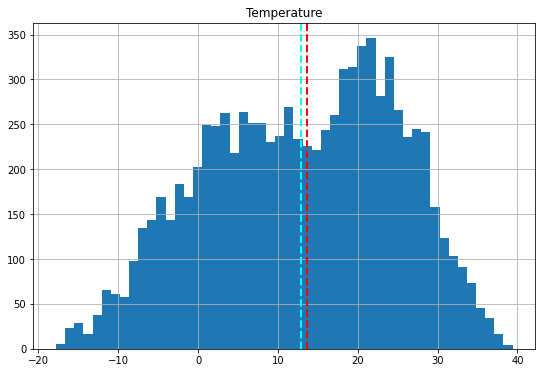

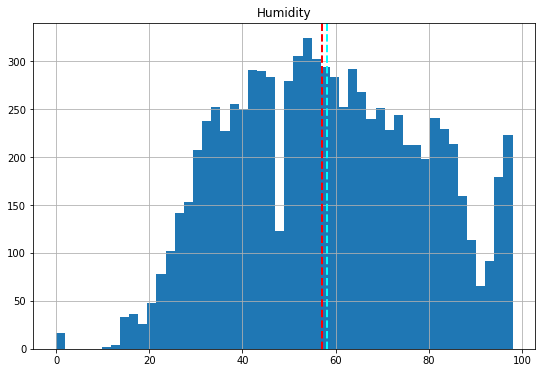

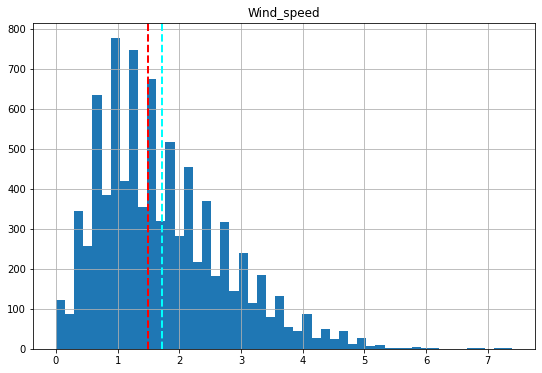

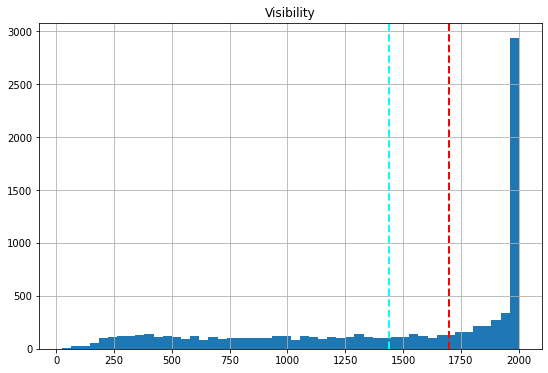

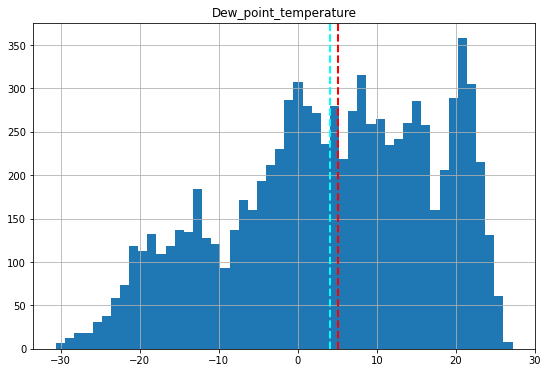

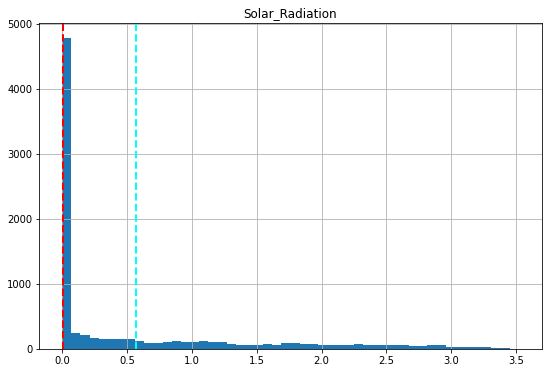

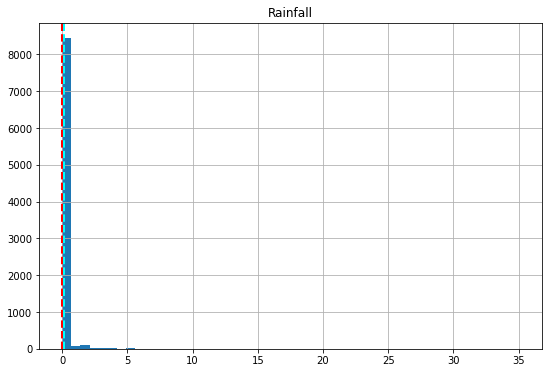

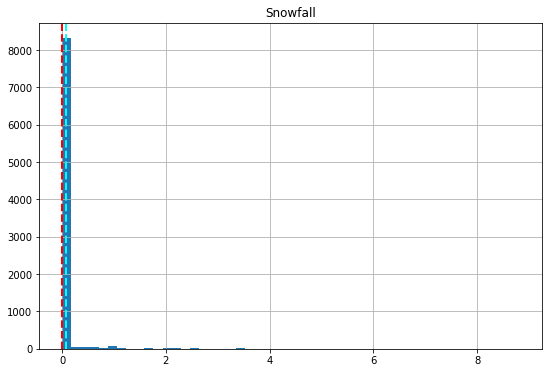

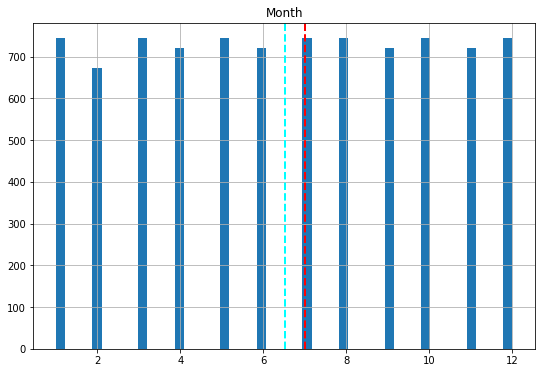

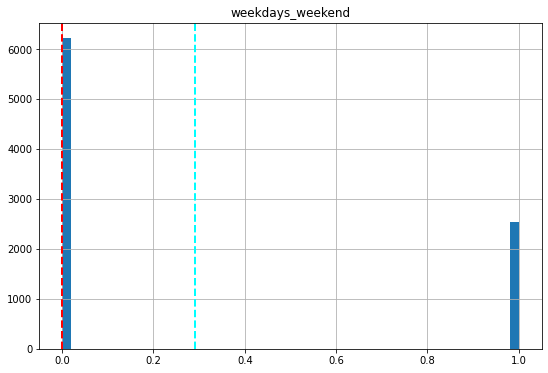

In [483]:
# Plotting a histogram graph to check where mean and medians are lying in the distribution and how the data points in variables are distributed.

for col in numerical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


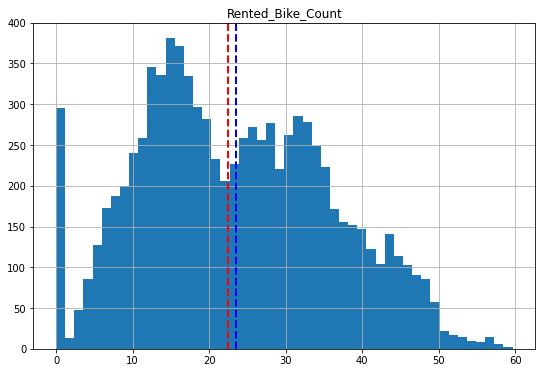

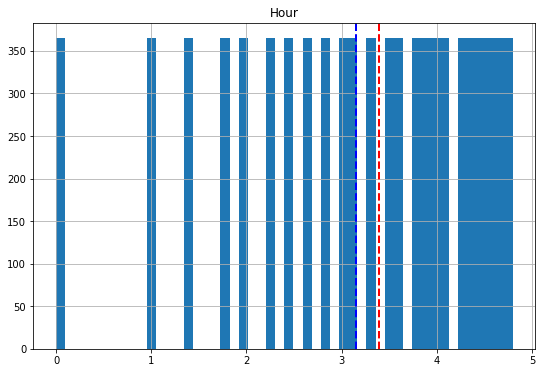

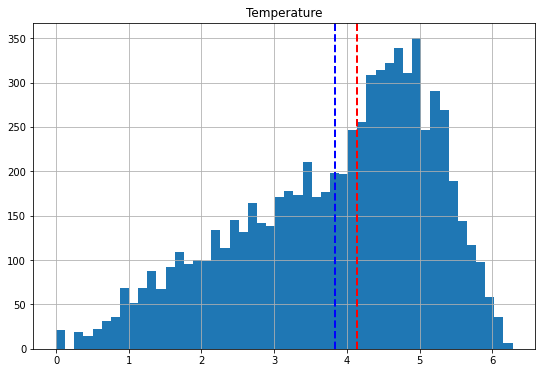

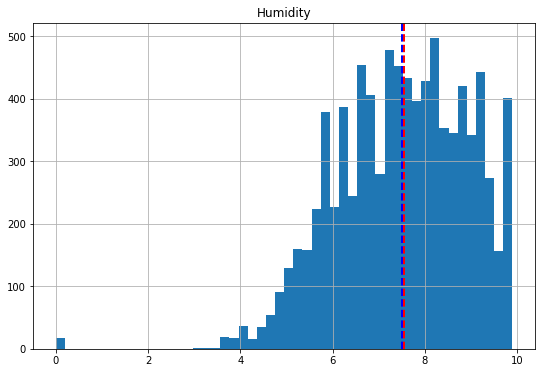

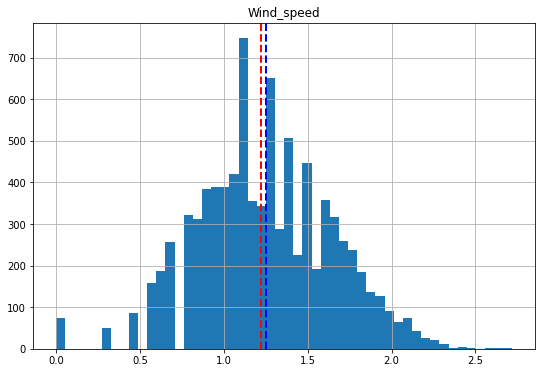

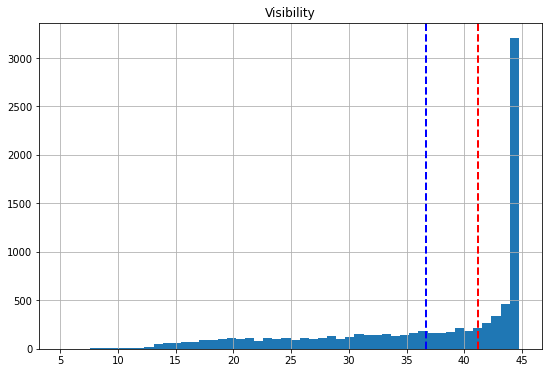

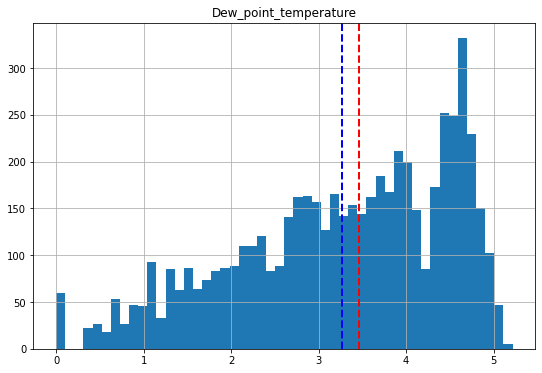

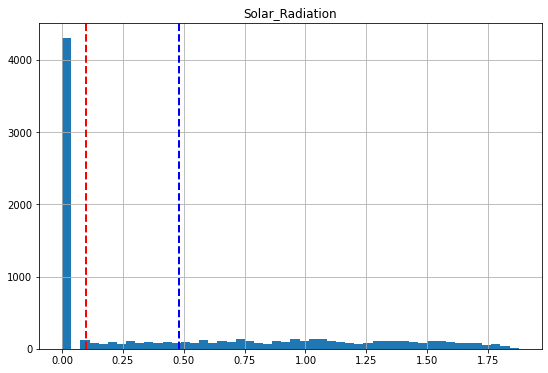

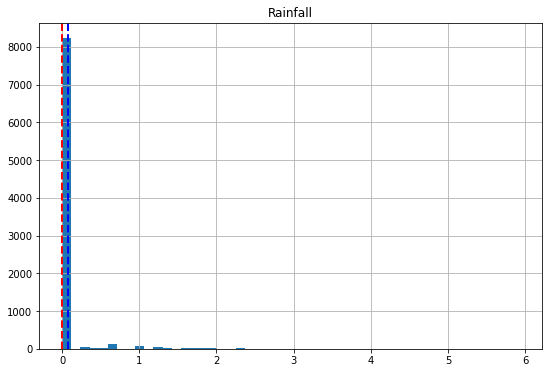

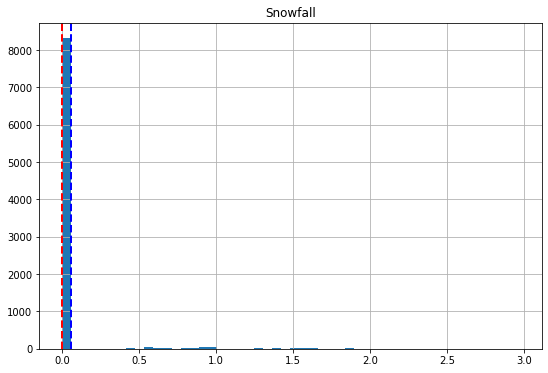

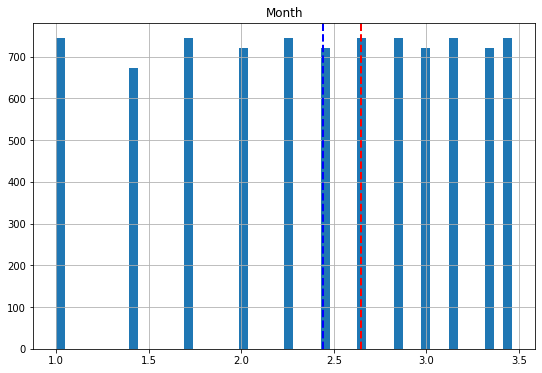

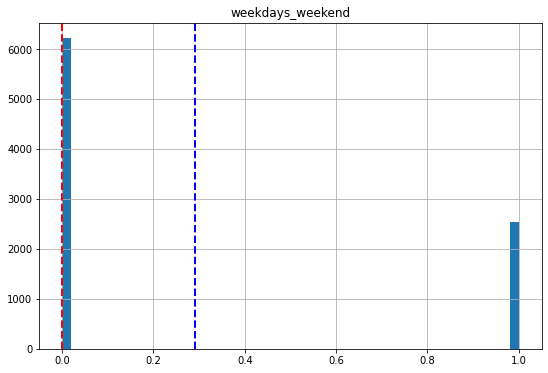

In [484]:
# Normalizing The variables using squre root method.
for col in numerical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_data[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='blue', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### **Checking the relationship between the dependent variable-"Rented Bike Count' and independent variables through Regressionplot**

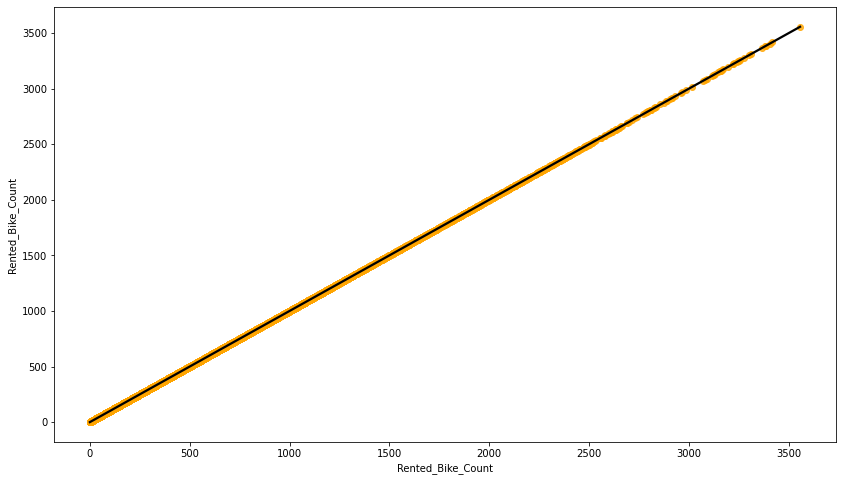

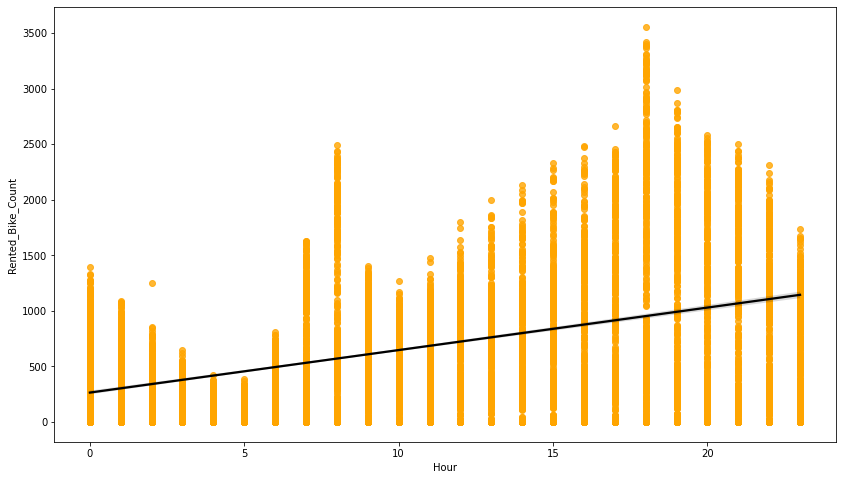

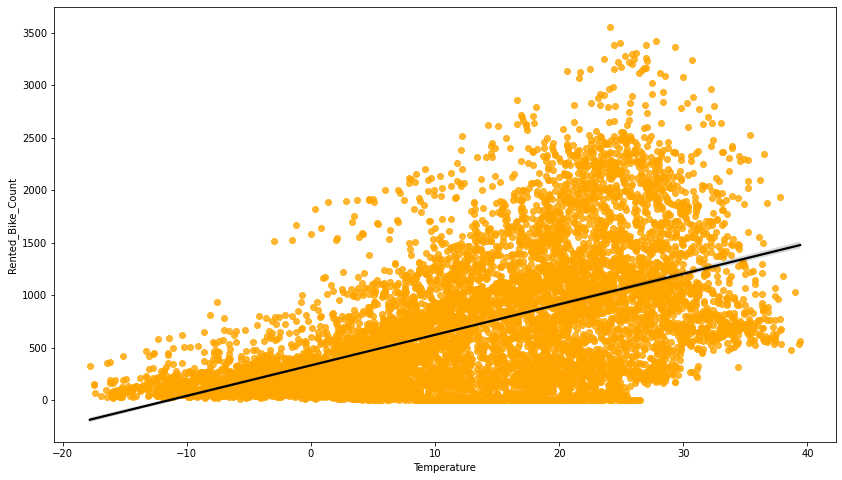

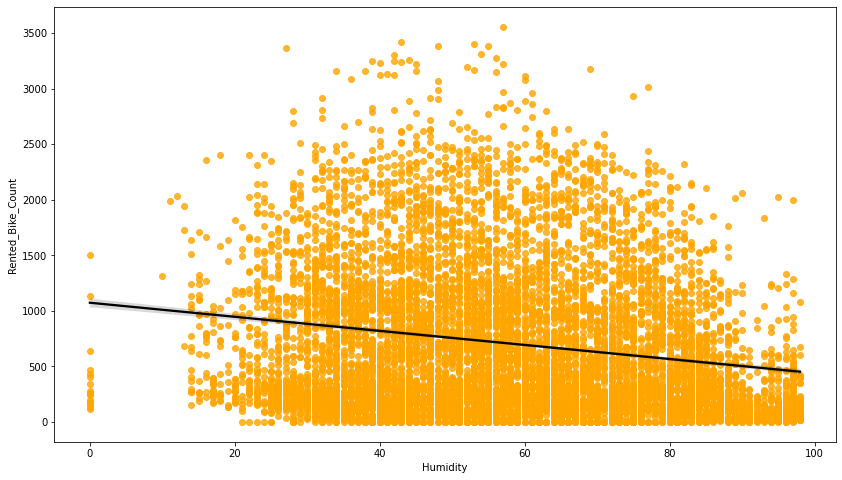

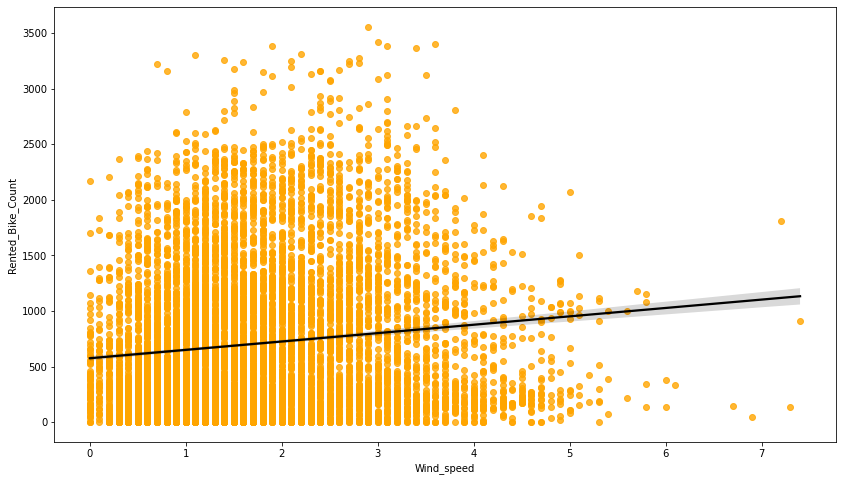

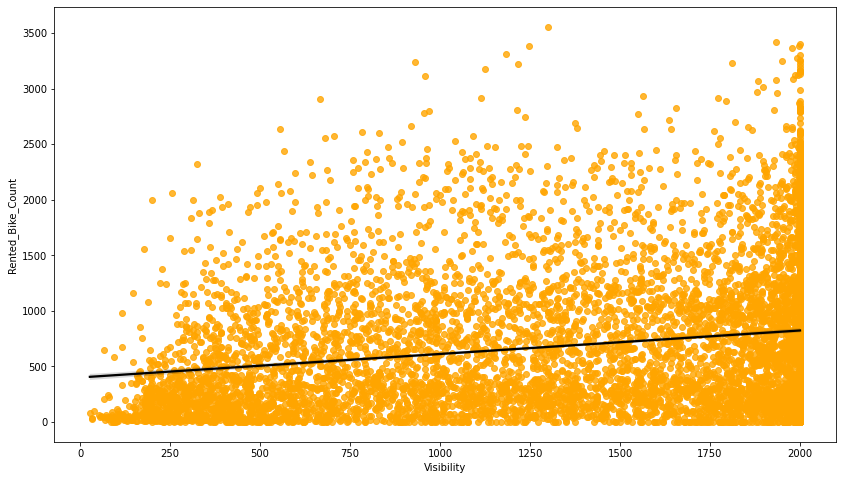

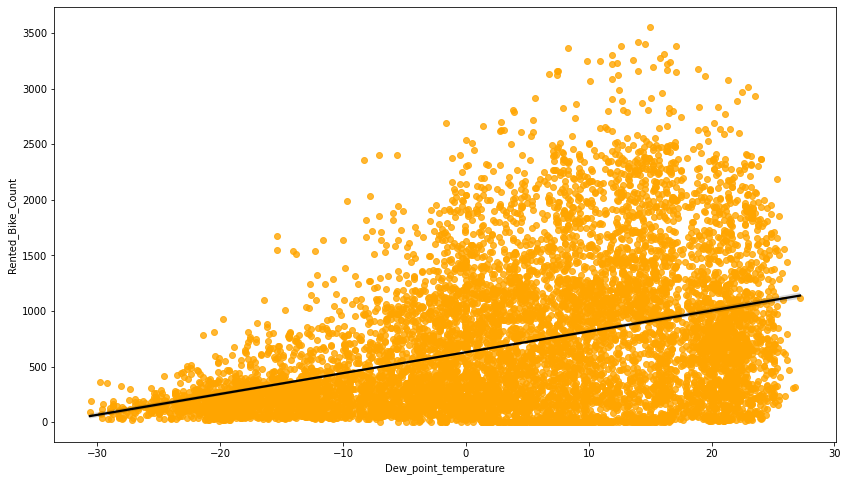

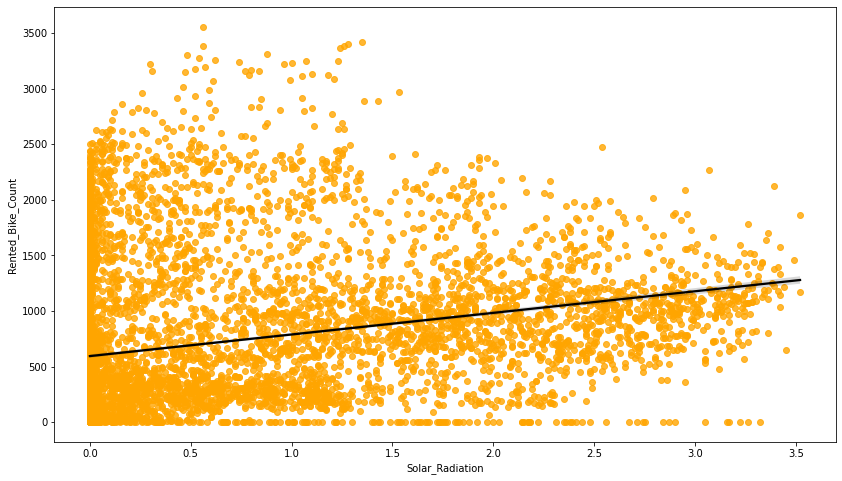

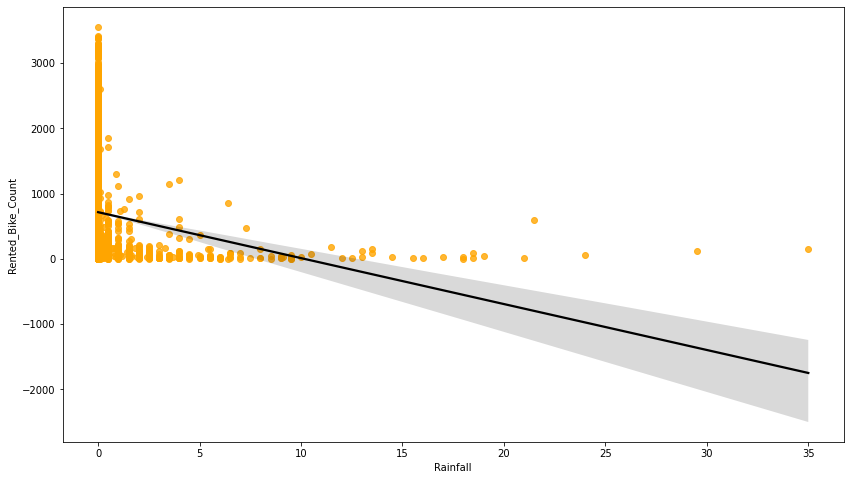

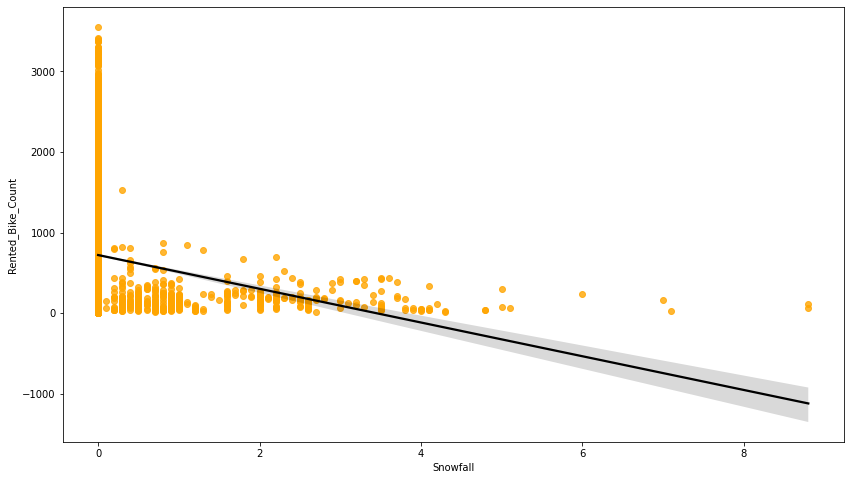

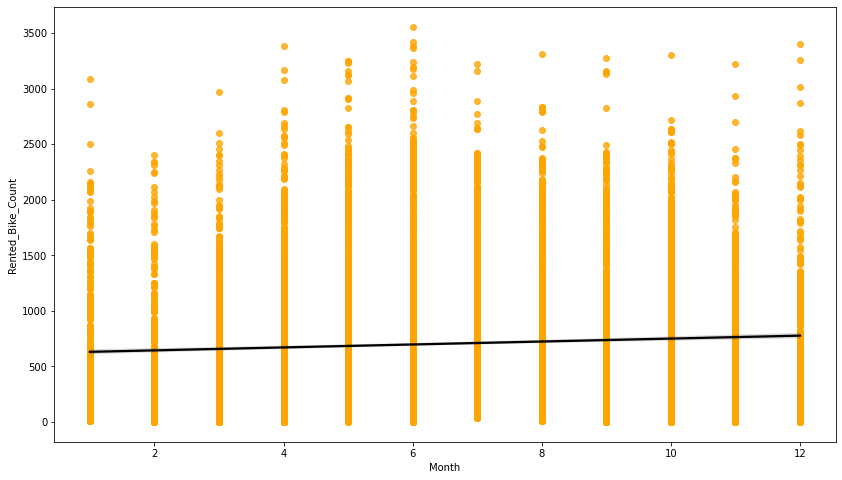

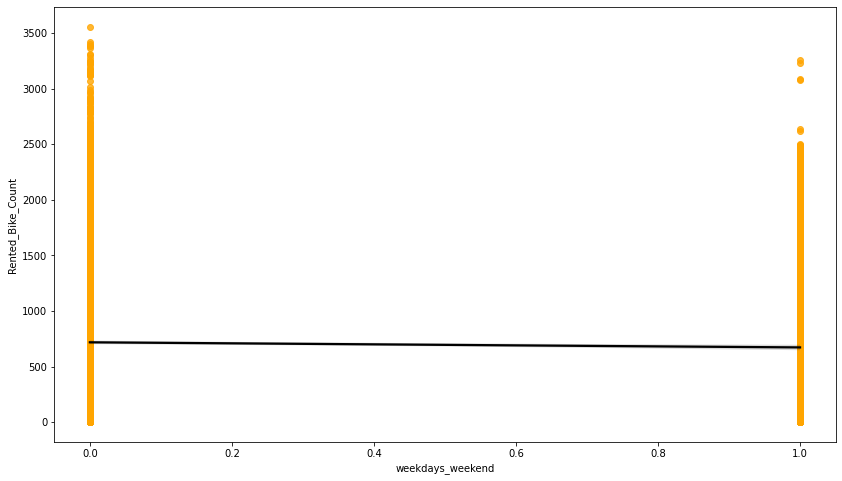

In [485]:
#Printing the regression plot for all the numerical features
for col in numerical_columns:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=bike_data[col],y=bike_data['Rented_Bike_Count'],scatter_kws={'color':'orange'},line_kws={'color':'black'})

From the above regression plot of all numerical variables, we see that the attributes, 

'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively related to the target variable,
which means the rented bike count increases with increase of these features.

'Rainfall', 'Snowfall', 'Humidity' features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

# **Observations and Results**

**Hour:**

1)There is sudden peak between 6/7 AM to 10 AM. Office time,College time could be the reason for this sudden peak.

2) Again there is peak between 5 PM to 7 PM. This may be due to office leaving time for the above people.

3) We can say that, from morning 7 AM to Evening 7 PM we have good Bike Rent Count and from 7 PM to 7 AM Bike Rent count starts declining.

**Temperature:**

1) For decrease in temperature below 0 degrees celsius, the bike rent counts significantly decreased, this may be because most people dont want to ride bike in cold temperatures.

2) But for normal temperature the Bike rent count is high.

**Humidity:**

Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

**Wind Speed:**

Upto wind speed 4 m/s there is good bike rent count and we also observed, when the speed of wind is 7 m/s, the demand for bike rentals increased rapidly, from which we can say that peoples love to ride bikes when its little windy..

**Visibility:**

It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

**Dew Point Temperature:**

It's again the same case as of temperature. As dew temperature goes below 0 degrees celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong collinearity.

**Solar radiation:**

Here the amount of rented bikes is huge, when there is solar radiation.

**Rainfall And snowfall:**

Its very obivious that people usually do not like to ride bikes in rain and snowfall.

## **Checking Correlation between dependent and independent variable.**

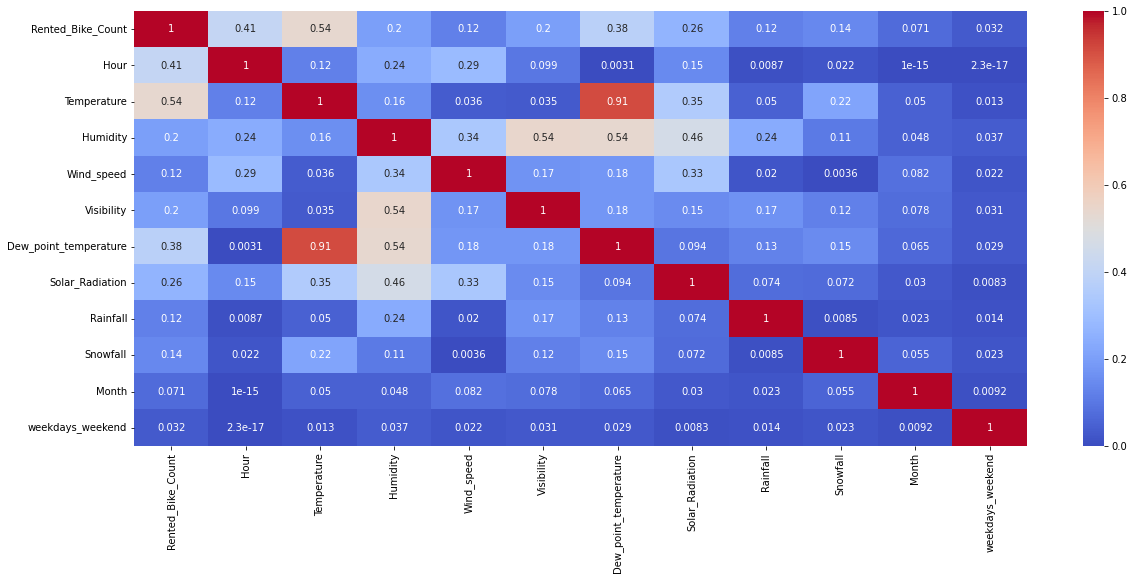

In [486]:
#Plotting the Correlation matrix
plt.figure(figsize=(20,8))
corr=bike_data.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

From the above heatmap we can say that,

"Temperature" and "Dew point Temperature" are highly correlated.
As per our regression assumption, there should not be colinearity between independent variables.
So we can drop one of them.

As the correlation between temperature and our dependent variable "Bike Rented Count" is high, we will Keep the Temperature column and drop the "Dew Point Temperature" column.

In [487]:
bike_df=bike_data.copy()

# **Preparing the Data for Modeling**

In [488]:
bike_df.head(1)


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [489]:
# Dropping dew point temperature as Temperature and Dew point temperature are corelated with each other.
bike_df.drop('Dew_point_temperature',inplace=True,axis=1)


In [490]:
#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [491]:
Calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.961874
1,Temperature,3.236809
2,Humidity,6.114153
3,Wind_speed,4.616621
4,Visibility,5.404128
5,Solar_Radiation,2.272068
6,Rainfall,1.081252
7,Snowfall,1.125304
8,Month,4.580307
9,weekdays_weekend,1.399708


VIF of Humidity and Visibility is greater than 5 so we will remove them.

In [492]:
Calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.755736
1,Temperature,2.492225
2,Wind_speed,3.748534
3,Solar_Radiation,1.893823
4,Rainfall,1.030569
5,Snowfall,1.077566
6,Month,3.049391
7,weekdays_weekend,1.350943


Now we have VIF values in the range of 1 to 5. So we will drop 'Humidity','Visibility' attributes from our dataset

In [493]:
#Dropping humidity and visibility attributes.
bike_df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [494]:
# Checking categoiries in season attributes.
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [495]:
# Creating dummy variables for seasons
bike_df=pd.get_dummies(bike_df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [496]:
#Checking categoiries in holiday attributes.
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [497]:
# Labeling for holiday=1 and no holiday=0
bike_df['Holiday']=bike_df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [498]:
# # Labeling for Yes=1 and No=0
bike_df['Functioning_Day']=bike_df['Functioning_Day'].map({'Yes':1, 'No':0})

In [499]:
# Checking labled columns
bike_df.head(10)

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.00,0.0,0.0,0,1,1,0,0,0,1
1,204,1,-5.5,0.8,0.00,0.0,0.0,0,1,1,0,0,0,1
2,173,2,-6.0,1.0,0.00,0.0,0.0,0,1,1,0,0,0,1
3,107,3,-6.2,0.9,0.00,0.0,0.0,0,1,1,0,0,0,1
4,78,4,-6.0,2.3,0.00,0.0,0.0,0,1,1,0,0,0,1
5,100,5,-6.4,1.5,0.00,0.0,0.0,0,1,1,0,0,0,1
6,181,6,-6.6,1.3,0.00,0.0,0.0,0,1,1,0,0,0,1
7,460,7,-7.4,0.9,0.00,0.0,0.0,0,1,1,0,0,0,1
8,930,8,-7.6,1.1,0.01,0.0,0.0,0,1,1,0,0,0,1
9,490,9,-6.5,0.5,0.23,0.0,0.0,0,1,1,0,0,0,1


In [500]:
#Checking the info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning_Day    8760 non-null   int64  
 9   Month              8760 non-null   int64  
 10  weekdays_weekend   8760 non-null   int64  
 11  Seasons_Spring     8760 non-null   uint8  
 12  Seasons_Summer     8760 non-null   uint8  
 13  Seasons_Winter     8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


# **Linear Regression**

In [501]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=bike_df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(bike_df['Rented_Bike_Count'])

In [502]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [503]:
# Transforming data 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Here, even if we don't apply scaling, we will still get almost similar results.

Its a good practice to apply scaling to the linear regression models.

In [504]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [505]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [506]:
# Checking coefficents
l_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [507]:
#Dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.034125
Temperature,24.395632
Wind_speed,3.358253
Solar_Radiation,3.435103
Rainfall,-71.139711
Snowfall,-10.476341
Holiday,-3.005512
Functioning_Day,28.479819
Month,1.055219
weekdays_weekend,-0.589300


In [508]:
# Checking intercept
l_reg.intercept_

-21.47705344024816

In [509]:
# Checking score
l_reg.score(X_train,y_train)

0.6123528085603556

In [510]:
# Y predictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [511]:
# Evaluation of training data set

#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


Lets save the train data set results in dataframe

In [512]:
# Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [513]:
# Creating training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,5.8555,60.2995,7.7653,0.6124


## **Evaluation of test data set**

In [514]:
# Evaluation of Test data set

#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [515]:
# Saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [516]:
# Creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,5.8342,58.6242,7.6566,0.6183


On testing data R2 score is 0.6183 which is almost close to training data R2 score which is 0.612.

Hence we can say that our model performance is good and overfitting is not observed. We just need to improve our model performance.

In [517]:
# Defining a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [518]:
# Defining a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_actual values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [519]:
# Defining a function for Residuals of the regression that are normally distributed.
'''Homoscedasticity refers to whether these residuals are equally distributed or not.
 Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” '''
 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")

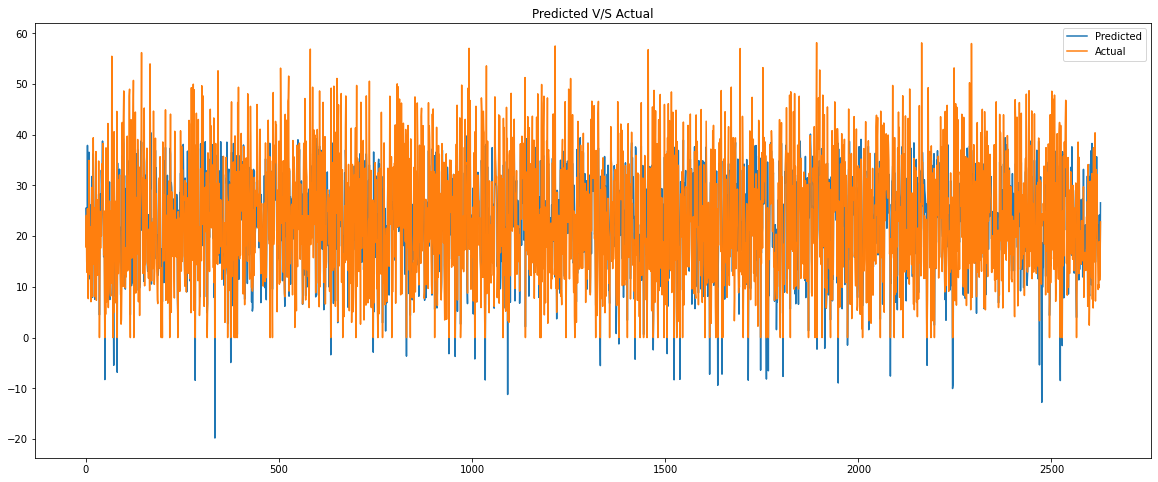

In [520]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

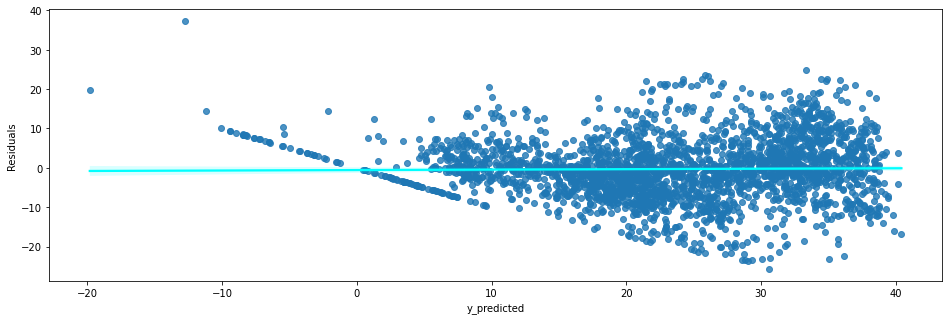

In [521]:
# Checking Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'cyan'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

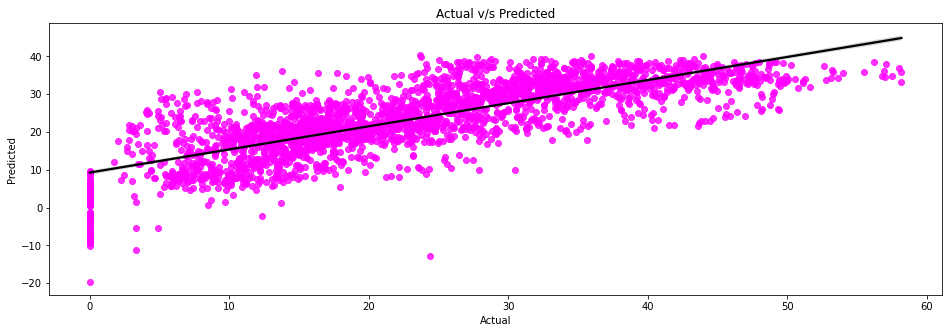

In [522]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


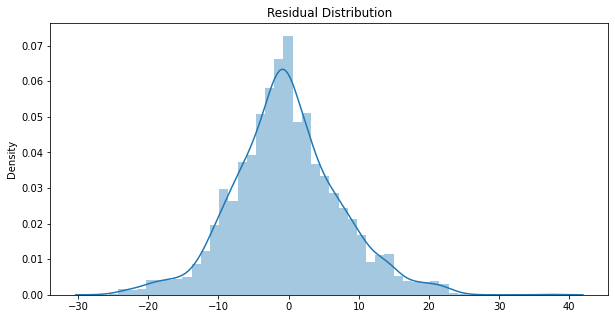

In [523]:
#Checking the residual distribution
Residual_distPlot(y_pred,y_test)


# **Lasso Regression**

In [524]:
# Creating an instance of Lasso Regression implementation
lasso_reg=Lasso(alpha=0.01)

In [525]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [526]:
# Checking coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [527]:
# Dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

,X,Coeficients
0,Hour,13.066187
1,Temperature,23.536896
2,Wind_speed,2.751126
3,Solar_Radiation,3.642599
4,Rainfall,-61.657076
5,Snowfall,-6.149695
6,Holiday,-2.723959
7,Functioning_Day,27.991986
8,Month,0.976145
9,weekdays_weekend,-0.516315


In [528]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

0.6112950857219155

In [529]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.61723035952942

In [530]:
# Check intercept
lasso_reg.intercept_

-20.65131177706763

In [531]:
# y prediction on train data
y_pred_train=lasso_reg.predict(X_train)

# y prediction on test data
y_pred=lasso_reg.predict(X_test)

## **Evaluation On Train Data.**

In [532]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [533]:
# Creating train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [534]:
# Appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8555,60.2995,7.7653,0.6124
1,Lasoo,5.8691,60.4640,7.7759,0.6113


## **Evaluation On Test Data.**

In [535]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [536]:
# Creating test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [537]:
# Appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8342,58.6242,7.6566,0.6183
1,Lasso,5.8506,58.7927,7.6676,0.6172


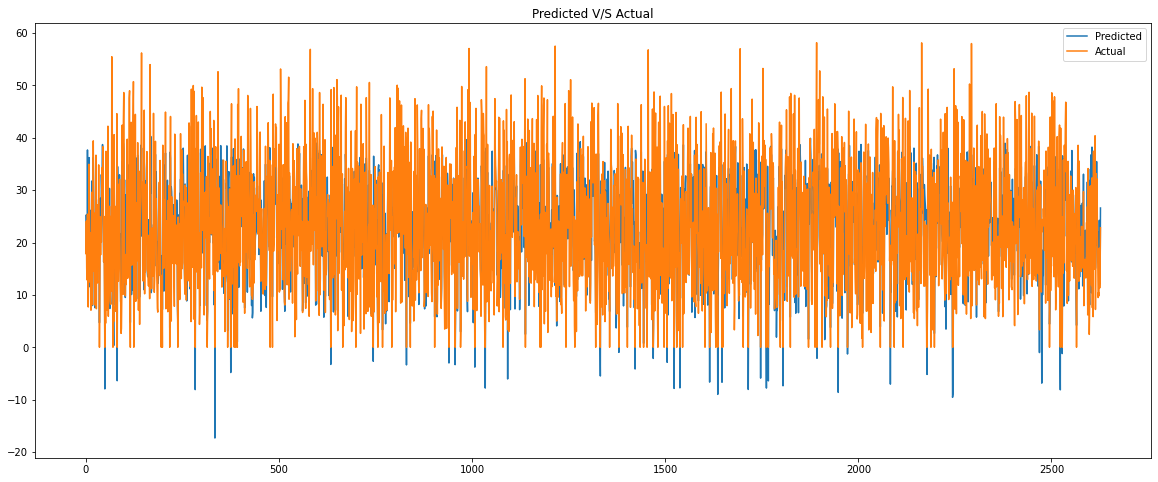

In [538]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

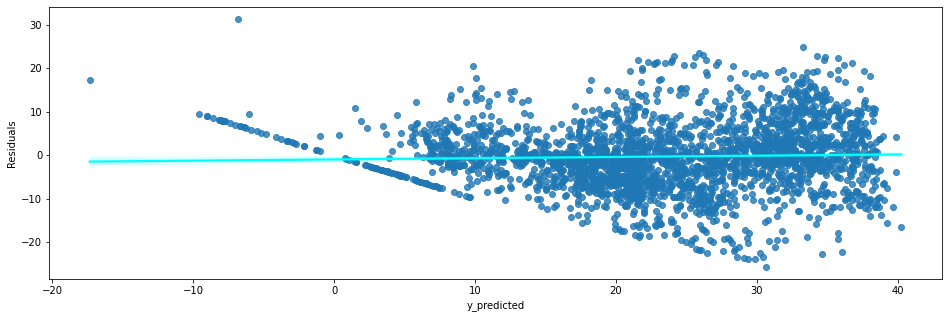

In [539]:
# Checking Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'cyan'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

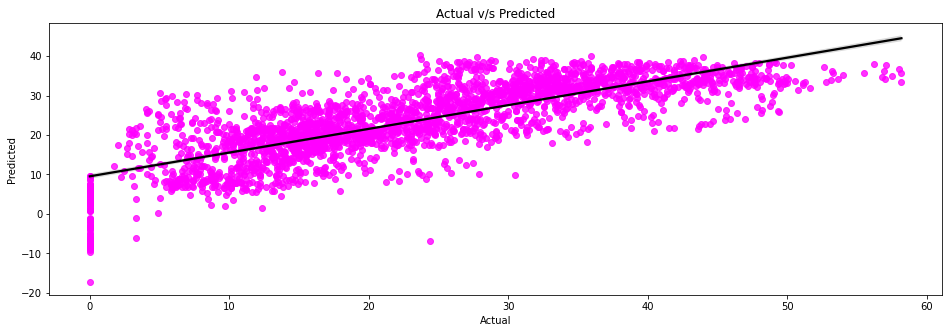

In [540]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


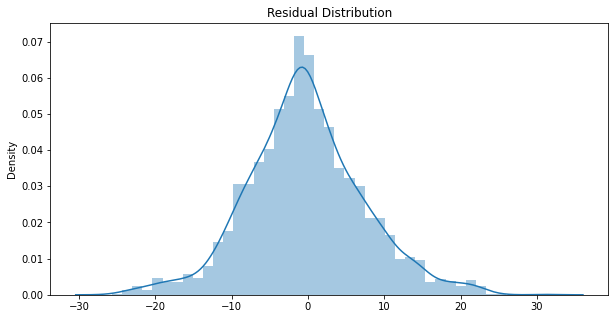

In [541]:
#Checking the residual distribution
Residual_distPlot(y_pred,y_test)

# **Ridge Regression**

In [542]:
# Creating an instance of Ridge Regression implementation
ridge_lg=Ridge(alpha=0.1)

In [543]:
# Fitting the model and training
ridge_lg.fit(X_train,y_train)


Ridge(alpha=0.1)

In [545]:
#Checking the score
#ridge.score(X_train, y_train)

In [546]:
# Checking coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [547]:
# Dataframe for x columns and coefficients
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Hour,13.033718
Temperature,24.345829
Wind_speed,3.349498
Solar_Radiation,3.457612
Rainfall,-70.044994
Snowfall,-10.412052
Holiday,-3.003039
Functioning_Day,28.461356
Month,1.056915
weekdays_weekend,-0.587370


In [548]:
# Checking intercept
ridge_lg.intercept_

-21.44118629409719

In [549]:
# y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)

# y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)

## **Evaluation On Train Data.**

In [550]:
# Evaluation of training data set

#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [551]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [552]:


traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8555,60.2995,7.7653,0.6124
1,Lasoo,5.8691,60.4640,7.7759,0.6113
2,Ridge GridSearchCV,5.8691,60.4640,7.7759,0.6113


## **Evaluation On Test Data.**




In [553]:
# Evaluation of Test data set

#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [554]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [555]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8342,58.6242,7.6566,0.6183
1,Lasso,5.8506,58.7927,7.6676,0.6172
2,Ridge(GridsearchCv Tunned),5.8506,58.7927,7.6676,0.6172


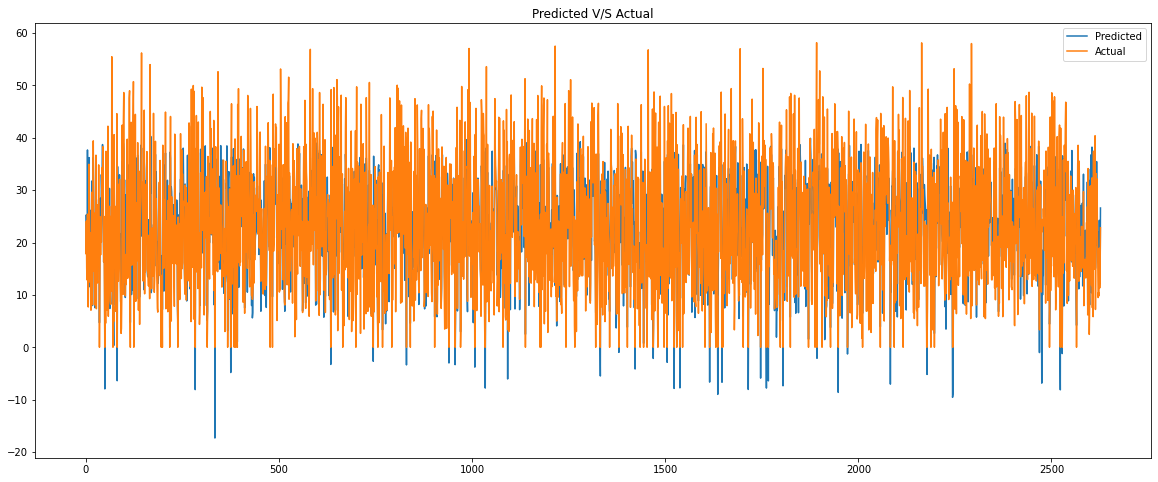

In [557]:
#plotting actual v/s actual
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

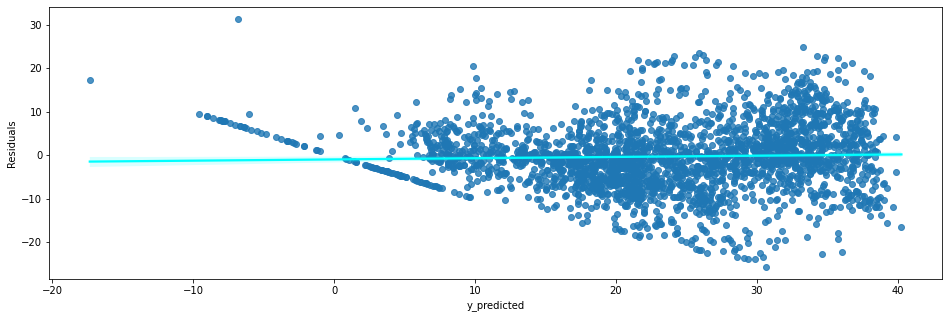

In [558]:

# Checking Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'cyan'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

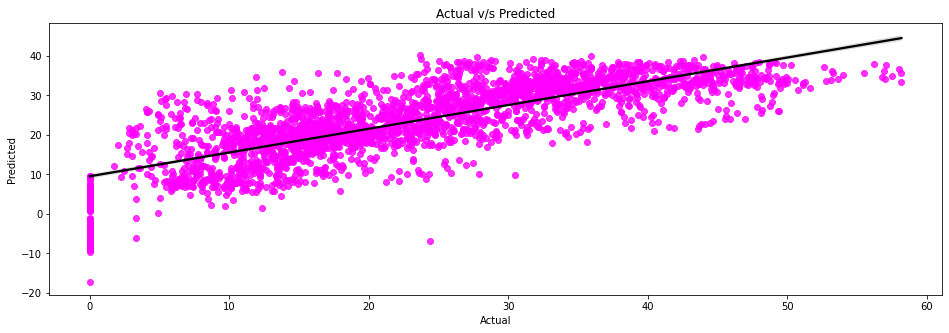

In [559]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


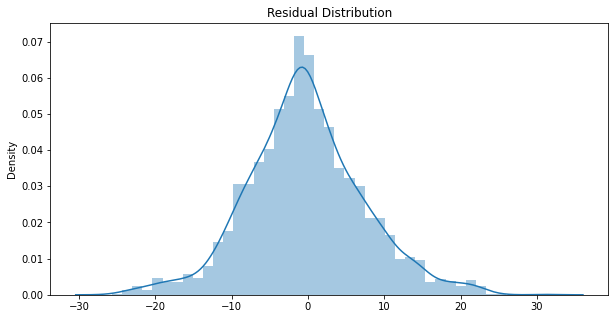

In [560]:

#Checking the Residual distribution
Residual_distPlot(y_pred,y_test)

In [561]:
# Importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

### **GridsearchCV on Ridge**

In [563]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to be passed on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)

# fitting model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0: The objective becomes same as simple linear regression. We’ll get the same coefficients as simple linear regression.

α = ∞: The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.

In [562]:
# Printing the best parameters and best score
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


best params are applied on the above ridge model. (Score on ridge is after hyperparameter tuning.)